## Data Dive 1

In [11]:
# Import modules needed for E.D.A.


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

pd.set_option('display.max_columns',200) #allows for up to 500 columns to be displayed when viewing a dataframe
pd.set_option('display.max_rows',100)
plt.style.use('ggplot') # a style that can be used for plots - see style reference above

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import os



In [12]:
# Check for current directory to ensure everyone in the group can access data

os.getcwd()

'/Users/nicksartino/Code/Data-Dive-1'

In [13]:
#  Read data into dataframe and print basic info

df = pd.read_csv('survey lung cancer.csv', index_col=[0])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 309 entries, M to M
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   AGE                    309 non-null    int64 
 1   SMOKING                309 non-null    int64 
 2   YELLOW_FINGERS         309 non-null    int64 
 3   ANXIETY                309 non-null    int64 
 4   PEER_PRESSURE          309 non-null    int64 
 5   CHRONIC DISEASE        309 non-null    int64 
 6   FATIGUE                309 non-null    int64 
 7   ALLERGY                309 non-null    int64 
 8   WHEEZING               309 non-null    int64 
 9   ALCOHOL CONSUMING      309 non-null    int64 
 10  COUGHING               309 non-null    int64 
 11  SHORTNESS OF BREATH    309 non-null    int64 
 12  SWALLOWING DIFFICULTY  309 non-null    int64 
 13  CHEST PAIN             309 non-null    int64 
 14  LUNG_CANCER            309 non-null    object
dtypes: int64(14), object(1)
memory

In [9]:
#  Confirm non-null values

df.isnull().sum()

AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [ ]:
#  Transform LUNG-CANCER object from YES NO to 1 2 to match other binary columns



In [8]:
#  Add some basic descriptive statistics

df.describe()

AGE     SMOKING  YELLOW_FINGERS     ANXIETY  PEER_PRESSURE  \
count  309.000000  309.000000      309.000000  309.000000     309.000000   
mean    62.673139    1.563107        1.569579    1.498382       1.501618   
std      8.210301    0.496806        0.495938    0.500808       0.500808   
min     21.000000    1.000000        1.000000    1.000000       1.000000   
25%     57.000000    1.000000        1.000000    1.000000       1.000000   
50%     62.000000    2.000000        2.000000    1.000000       2.000000   
75%     69.000000    2.000000        2.000000    2.000000       2.000000   
max     87.000000    2.000000        2.000000    2.000000       2.000000   

       CHRONIC DISEASE    FATIGUE     ALLERGY     WHEEZING  ALCOHOL CONSUMING  \
count       309.000000  309.000000  309.000000  309.000000         309.000000   
mean          1.504854    1.673139    1.556634    1.556634           1.556634   
std           0.500787    0.469827    0.497588    0.497588           0.497588   
min           1.000000    1.000000    1.000000    1.000000           1.000000   
25%           1.000000    1.000000    1.000000    1.000000           1.000000   
50%           2.000000    2.000000    2.000000    2.000000           2.000000   
75%           2.000000    2.000000    2.000000    2.000000           2.000000   
max           2.000000    2.000000    2.000000    2.000000           2.000000   

         COUGHING  SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN  
count  309.000000           309.000000             309.000000  309.000000  
mean     1.579288             1.640777               1.469256    1.556634  
std      0.494474             0.480551               0.499863    0.497588  
min      1.000000             1.000000               1.000000    1.000000  
25%      1.000000             1.000000               1.000000    1.000000  
50%      2.000000             2.000000               1.000000    2.000000  
75%      2.000000             2.000000               2.000000    2.000000  
max      2.000000             2.000000               2.000000    2.000000

In [5]:
#  Print a sample of the data 

df.head()

AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  CHRONIC DISEASE  \
GENDER                                                                          
M        69        1               2        2              1                1   
M        74        2               1        1              1                2   
F        59        1               1        1              2                1   
M        63        2               2        2              1                1   
F        63        1               2        1              1                1   

        FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
GENDER                                                              
M              2         1         2                  2         2   
M              2         2         1                  1         1   
F              2         1         2                  1         2   
M              1         1         1                  2         1   
F              1         1         2                  1         2   

        SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN LUNG_CANCER  
GENDER                                                                      
M                         2                      2           2         YES  
M                         2                      2           2         YES  
F                         2                      1           2          NO  
M                         1                      2           2          NO  
F                         2                      1           1          NO

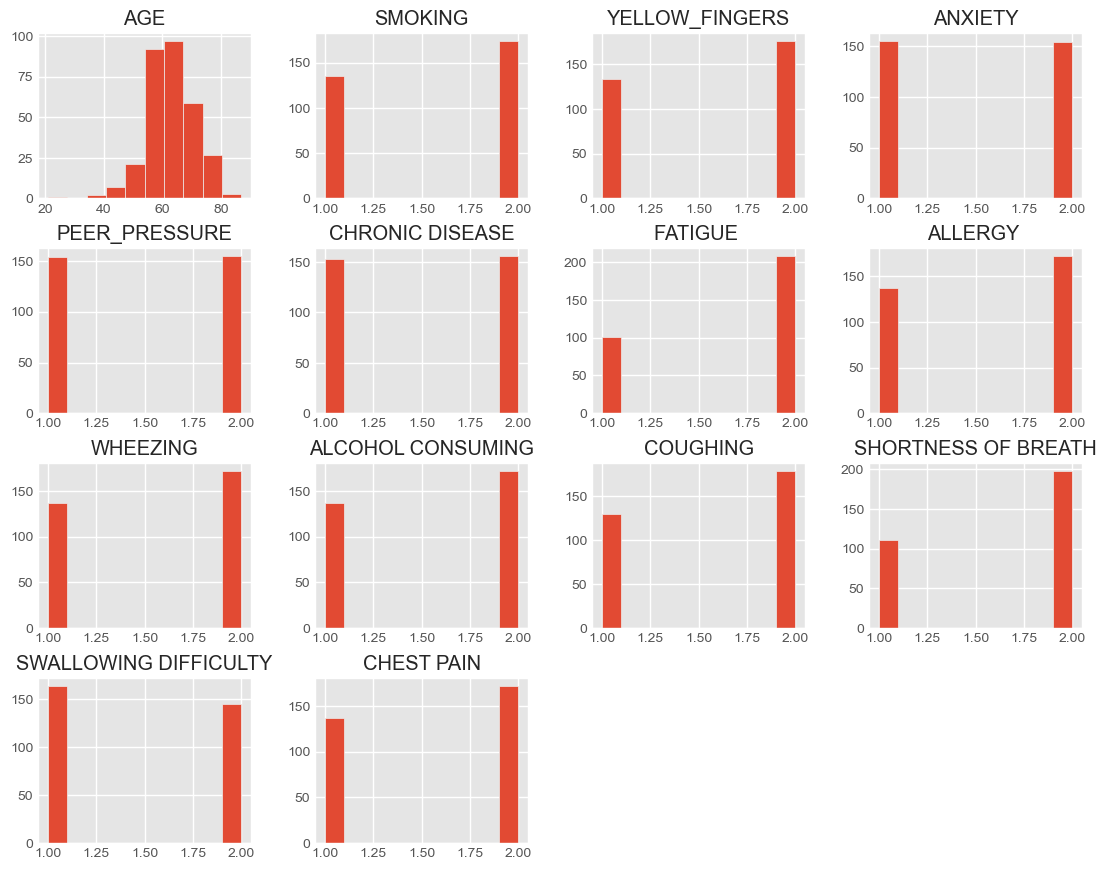

In [6]:
#  Display some histograms to get a quick visualization of the data

df.hist(figsize=(12,10))
plt.show()

In [16]:
# Group by age




In [30]:
# Look at symptoms (coughing, shortness of breath) by alcohol and smoking - Vice Penalty

grouped = df.groupby(['LUNG_CANCER'])
grouped_smoking = grouped['SMOKING'].agg('count')
grouped_smoking

LUNG_CANCER
NO      39
YES    270
Name: SMOKING, dtype: int64

In [35]:
grouped2 = df.groupby(['LUNG_CANCER'])
grouped_alcohol = grouped2['ALCOHOL CONSUMING'].agg('count')
grouped_alcohol

LUNG_CANCER
NO      39
YES    270
Name: ALCOHOL CONSUMING, dtype: int64

In [36]:
grouped3 = df.groupby(['LUNG_CANCER'])
grouped_alcohol = grouped3['CHRONIC DISEASE'].agg('count')
grouped_alcohol

LUNG_CANCER
NO      39
YES    270
Name: CHRONIC DISEASE, dtype: int64

In [ ]:
# Perform single linear regression for three selected variables, alcohol, smoking, and chronic disease

